### Importing libraries

# Data Augmentation

## Overview

Data augmentation is a technique used to increase the diversity of data available for training models without actually collecting new data. This technique is commonly employed in machine learning and deep learning to improve model performance and generalization.

## Importance of Data Augmentation

### 1. Improves Model Generalization
By exposing the model to various transformations of the data, it becomes more robust to variations in the real world. This helps the model to generalize better when it encounters new, unseen data.

### 2. Reduces Overfitting
Augmented data acts as a regularizer. It helps in reducing overfitting, especially when the dataset is small. Overfitting occurs when a model learns the details and noise in the training data to an extent that it negatively impacts the model’s performance on new data.

### 3. Expands Dataset Size
Data augmentation artificially increases the size of the training dataset. This is particularly beneficial when collecting new data is expensive or time-consuming.

## Common Techniques

### Image Data Augmentation

1. **Flipping**
   - Horizontally or vertically flipping the images to create mirror images.
   
2. **Rotation**
   - Rotating images by a certain degree to make the model invariant to orientation.
   
3. **Scaling**
   - Scaling images up or down to simulate different zoom levels.
   
4. **Translation**
   - Shifting the image along the x or y axis to simulate different viewpoints.
   
5. **Cropping**
   - Randomly cropping a part of the image to focus on different sections.
   
6. **Color Jittering**
   - Changing the brightness, contrast, saturation, and hue to simulate different lighting conditions.
   
7. **Gaussian Noise**
   - Adding random noise to the image to make the model robust to noisy inputs.

### Text Data Augmentation

1. **Synonym Replacement**
   - Replacing words with their synonyms to create variations in the text.
   
2. **Random Insertion**
   - Randomly inserting words in the sentence to add variety.
   
3. **Random Swap**
   - Swapping words in the sentence to create new sentence structures.
   
4. **Random Deletion**
   - Randomly deleting words from the sentence to shorten and vary the text.
   
5. **Back Translation**
   - Translating the sentence to another language and back to the original language to create paraphrases.

### Audio Data Augmentation

1. **Time Stretching**
   - Slowing down or speeding up the audio without changing the pitch.
   
2. **Pitch Shifting**
   - Changing the pitch of the audio without affecting the speed.
   
3. **Background Noise**
   - Adding random noise to the audio to simulate different environments.
   
4. **Random Cropping**
   - Cropping a random part of the audio to create shorter clips.
   
5. **Volume Control**
   - Randomly increasing or decreasing the volume to simulate different recording levels.

#### Example of Image Dataset

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### Downloading dataset from Url

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir = '.',untar = True)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 21s 0us/step


'.\\datasets\\flower_photos'

In [2]:
data_dir = '.\\datasets\\flower_photos'

In [3]:
import pathlib
data_dir = pathlib.Path(data_dir)  # for making a windows-path data variable
data_dir

WindowsPath('datasets/flower_photos')

### Getting total number of images in directory and their Path 

In [4]:
list(data_dir.glob('*/*.jpg'))  
# for making a list all those strings in windows path (they can be subdirectory file objects) which one is given.

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [5]:
total_images = len(list(data_dir.glob('*/*.jpg')))
total_images

3670

#### Selecting Specific Images of ine type of flower

In [6]:
roses =  list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [7]:
daisy = list(data_dir.glob('daisy/*'))
daisy[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [8]:
dandelion = list(data_dir.glob('dandelion/*'))
dandelion[:5]

[WindowsPath('datasets/flower_photos/dandelion/10043234166_e6dd915111_n.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10200780773_c6051a7d71_n.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10294487385_92a0676c7d_m.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10437652486_aa86c14985.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10443973_aeb97513fc_m.jpg')]

In [9]:
tulips = list(data_dir.glob('tulips/*'))
tulips[:5]

[WindowsPath('datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg')]

In [10]:
sunflowers = list(data_dir.glob('sunflowers/*'))
sunflowers[:5]

[WindowsPath('datasets/flower_photos/sunflowers/1008566138_6927679c8a.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/1022552002_2b93faf9e7_n.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/1022552036_67d33d5bd8_n.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386503264_e05387e1f7_m.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386522775_4f8c616999_m.jpg')]

#### Displaying Image 

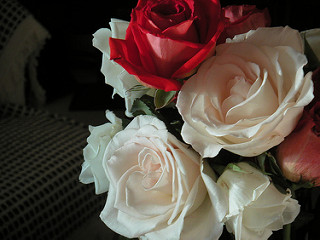

In [11]:
PIL.Image.open(str(roses[1])) # Roses 

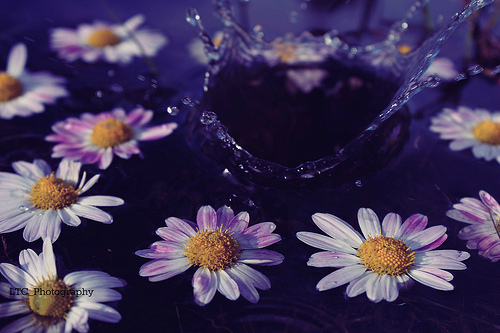

In [12]:
PIL.Image.open(str(daisy[3])) # daisy 

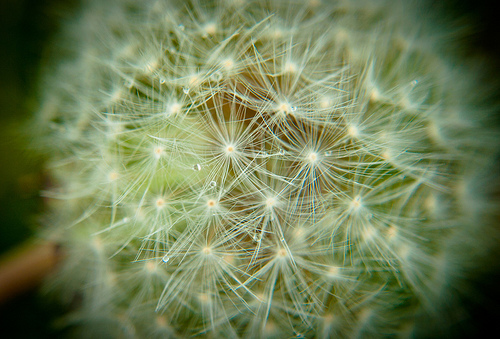

In [13]:
PIL.Image.open(str(dandelion[3])) # dandelion 

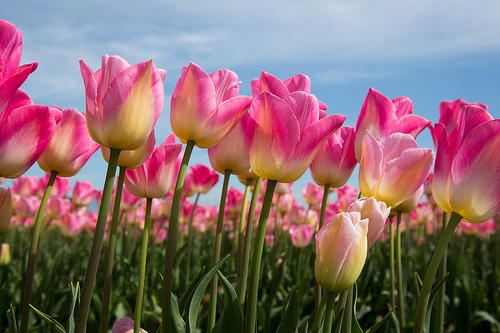

In [14]:
PIL.Image.open(str(tulips[3])) # tulips

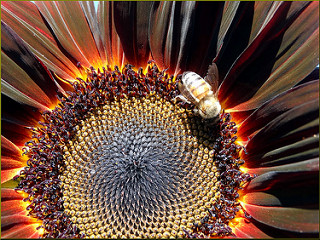

In [15]:
PIL.Image.open(str(sunflowers[6])) # Sunflowers

#### Making a dictonary of flower Image and their corresponding paths

In [16]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}

In [17]:
flower_labels_dict = {
    'roses':0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4
}

#### Reading image form cv2 (OpenCv) library into 3D-array fromate

In [18]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [19]:
img.shape  # shape of image in roses at 0th position

(240, 179, 3)

#### img array manipualtion

In [20]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [21]:
cv2.resize(img,(180,180))

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

#### Checking total number of Images in Each Class

In [22]:
x,y = [], []
for flowers, img in flowers_images_dict.items():
    print('-',flowers, "has", len(img), "number of images")

- roses has 641 number of images
- daisy has 633 number of images
- dandelion has 898 number of images
- sunflowers has 699 number of images
- tulips has 799 number of images


#### To store images in resized manner

In [24]:
x, y= [], []

for flw_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(flower_labels_dict[flw_name])

In [25]:
x = np.array(x)
y = np.array(y)

#### Ensuring Data splitting Safely

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [33]:
print('Independent variable')
print('Length of training set ',len(x_train), 'and testing set', len(x_test))

Independent variable
Length of training set  2752 and testing set 918


In [34]:
print('Dependant variable')
print('Length of training set ',len(x_train), 'and testing set', len(x_test))

Dependant variable
Length of training set  2752 and testing set 918


#### Scaling the values to a specific range

In [35]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [36]:
x_train_scaled[2]

array([[[0.03921569, 0.08627451, 0.10588235],
        [0.14901961, 0.2       , 0.21176471],
        [0.10196078, 0.15294118, 0.16470588],
        ...,
        [0.03921569, 0.1372549 , 0.12941176],
        [0.05098039, 0.14509804, 0.13333333],
        [0.07058824, 0.15686275, 0.1372549 ]],

       [[0.0627451 , 0.1254902 , 0.12156863],
        [0.08627451, 0.15294118, 0.14901961],
        [0.10588235, 0.17647059, 0.16862745],
        ...,
        [0.04313725, 0.14117647, 0.1254902 ],
        [0.03921569, 0.1372549 , 0.11764706],
        [0.00392157, 0.07058824, 0.03921569]],

       [[0.04313725, 0.12941176, 0.10196078],
        [0.00784314, 0.09411765, 0.06666667],
        [0.02745098, 0.11372549, 0.08627451],
        ...,
        [0.03921569, 0.12941176, 0.11372549],
        [0.00784314, 0.09803922, 0.07843137],
        [0.04313725, 0.12941176, 0.10196078]],

       ...,

       [[0.03137255, 0.10588235, 0.08235294],
        [0.11372549, 0.14117647, 0.14509804],
        [0.18431373, 0

#### Sample ANN model

In [54]:
num_classes = 5

model = Sequential([
    layers.Conv2D(16, 3, padding ='same', activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(num_classes, activation = 'softmax')
])
model.build()

In [55]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [56]:
model.fit(x_train_scaled, y_train, epochs = 30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 32s 237ms/step - accuracy: 0.3630 - loss: 1.4561
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 215ms/step - accuracy: 0.6217 - loss: 0.9755
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 209ms/step - accuracy: 0.7201 - loss: 0.7451
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 198ms/step - accuracy: 0.8018 - loss: 0.5430
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 176ms/step - accuracy: 0.8754 - loss: 0.3771
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 177ms/step - accuracy: 0.9295 - loss: 0.2142
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 175ms/step - accuracy: 0.9771 - loss: 0.0865
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 174ms/step - accuracy: 0.9831 - loss: 0.0549
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 176ms/step - accuracy: 0.9857 - loss: 0.0580
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 174ms/step - accuracy: 0.9860 - loss: 0.0592
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 175ms/step - accuracy: 0.9984 - loss: 0.0158
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15

**case of Overfiting**

In [57]:
model.evaluate(x_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.6727 - loss: 2.0404


[2.0933127403259277, 0.6786492466926575]

In [58]:
predictions = model.predict(x_test_scaled)

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step


In [59]:
predictions

array([[6.2679799e-09, 1.0000000e+00, 8.4595135e-12, 7.7876697e-19,
        1.6252314e-09],
       [9.9883670e-01, 6.0127268e-04, 5.1136492e-08, 1.7579733e-06,
        5.6040555e-04],
       [8.4943288e-09, 1.4560351e-04, 9.9985421e-01, 2.0568297e-11,
        7.1137620e-08],
       ...,
       [2.6731379e-02, 9.6613689e-08, 3.4778576e-08, 9.5257610e-01,
        2.0692384e-02],
       [5.0557271e-04, 9.9943298e-01, 4.2312597e-05, 1.4935048e-05,
        4.2120209e-06],
       [1.9477045e-05, 7.9999611e-11, 8.3758577e-04, 9.7028506e-01,
        2.8857935e-02]], dtype=float32)

#### Data Augmentation 

In [64]:
img_height, img_width = 180,180
augmentation = keras.Sequential([
    layers.RandomZoom(0.3),
    layers.RandomContrast(0.9),
    layers.RandomFlip('horizontal',
                     input_shape = (img_height,
                                   img_width,
                                   3)),
    layers.RandomRotation(0.1)
])

C:\Users\Satoshi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### ANN Model after Augmentation

In [66]:
num_classes = 5

model_2 = Sequential([
    augmentation,
    layers.Conv2D(16, 3, padding ='same', activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(num_classes, activation = 'softmax')
])
model_2.build()

In [68]:
model_2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [72]:
model_2.fit(x_train_scaled, y_train, epochs = 30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 221ms/step - accuracy: 0.5237 - loss: 1.1423
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 217ms/step - accuracy: 0.5571 - loss: 1.1186
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 214ms/step - accuracy: 0.5566 - loss: 1.0976
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 211ms/step - accuracy: 0.5965 - loss: 1.0353
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 210ms/step - accuracy: 0.5965 - loss: 1.0076
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 222ms/step - accuracy: 0.6207 - loss: 0.9818
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 218ms/step - accuracy: 0.6112 - loss: 0.9768
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 226ms/step - accuracy: 0.6637 - loss: 0.8841
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 212ms/step - accuracy: 0.6510 - loss: 0.9367
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 211ms/step - accuracy: 0.6440 - loss: 0.8876
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 212ms/step - accuracy: 0.6420 - loss: 0.8740
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 18

In [74]:
model_2.evaluate(x_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.7386 - loss: 0.6836


[0.7021130919456482, 0.7352941036224365]

## Conclusion

Data augmentation is a powerful technique to enhance the performance and robustness of machine learning models. By applying various transformations to the training data, models can generalize better and perform well on unseen data. This is crucial in developing robust and reliable AI systems.